# Password Strength Classifier

by Jason Jiang

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_squared_error

In [2]:
# read csv file and display 5 random entries 
password_data = pd.read_csv("password_data.csv", error_bad_lines=False)
password_data.sample(10)

C:\Users\nosaJ\AppData\Local\Temp\ipykernel_20924\2612946990.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  password_data = pd.read_csv("password_data.csv", error_bad_lines=False)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32

,password,strength
182873,eddy&eric,1
90966,kolex18,0
240623,m3g70rie,1
193941,79y66kiw,1
281568,asywuw998,1
218893,1artereal,1
552314,uget55on1ji1y,1
365956,dhfOEYTgwMAB5uoA,2
101612,sugab1922,1
544319,agosto1,0


In [3]:
password_data.shape

(669640, 2)

In [4]:
password_data.describe()

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [5]:
password_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
password_data.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
password_data = password_data.dropna()

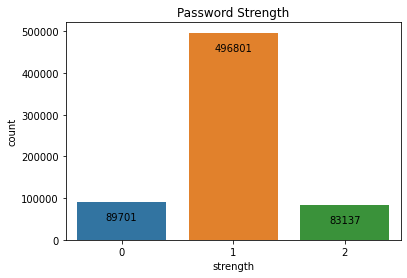

In [8]:
ax = sns.countplot(x=password_data['strength'])
plt.title('Password Strength')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0,-15), textcoords='offset points')
plt.show()

In [9]:
def pass_length(pass_str):
    # length of password
    return len(pass_str)

def pass_uppercase(pass_str):
    # uppercase letters in password
    count = 0
    for i in pass_str:
        if i.isupper():
            count += 1
    return count

def pass_lowercase(pass_str):
    # lowercase letters in password
    count = 0
    for i in pass_str:
        if i.islower():
            count += 1
    return count

def pass_numbers(pass_str):
    # numbers in password
    count = 0
    for i in pass_str:
        if i.isnumeric():
            count += 1
    return count

def pass_special(pass_str):
    # special characters in password (all non-word characters)
    non_word_pattern = re.compile(r'\W')
    count = len(non_word_pattern.findall(pass_str))
    return count

In [10]:
password_data['length'] = password_data['password'].apply(pass_length)
password_data['uppers'] = password_data['password'].apply(pass_uppercase)
password_data['lowers'] = password_data['password'].apply(pass_lowercase)
password_data['numbers'] = password_data['password'].apply(pass_numbers)
password_data['special'] = password_data['password'].apply(pass_special)

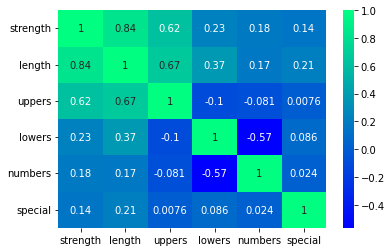

In [11]:
sns.heatmap(password_data.corr(), cmap='winter', annot=True)
plt.show()

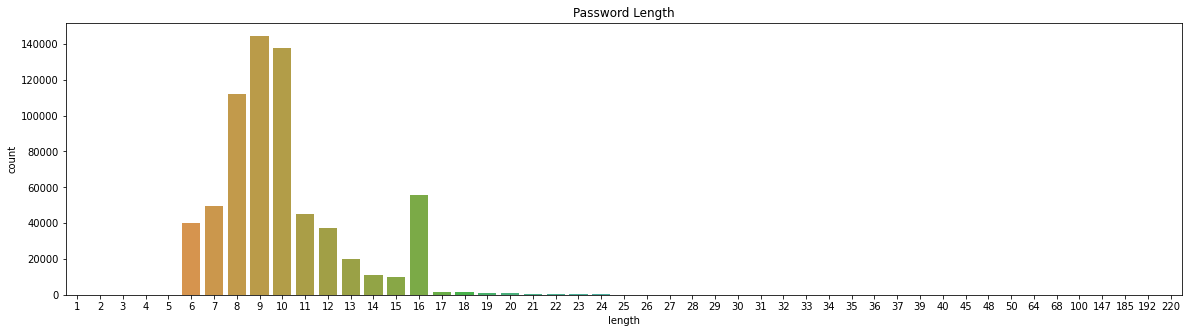

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(password_data, x="length")
plt.title('Password Length')
plt.show()

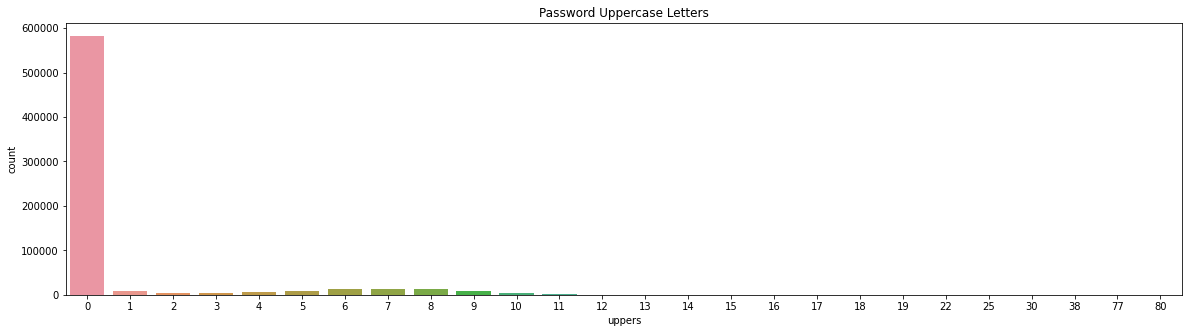

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(password_data, x="uppers")
plt.title('Password Uppercase Letters')
plt.show()

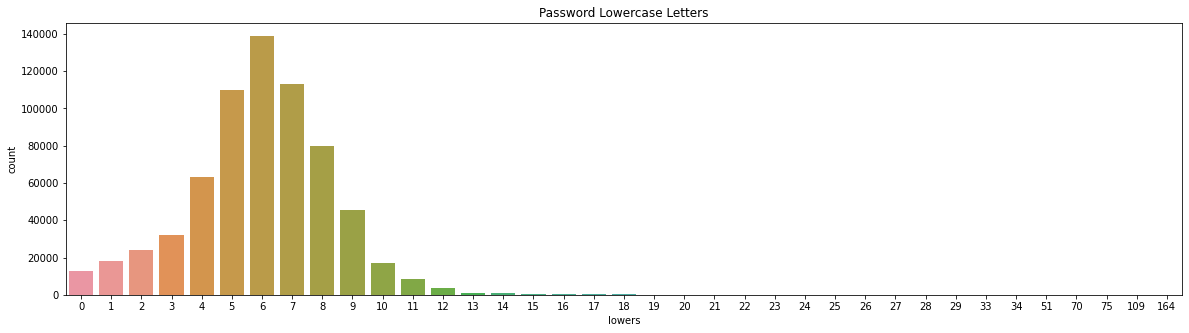

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(password_data, x="lowers")
plt.title('Password Lowercase Letters')
plt.show()

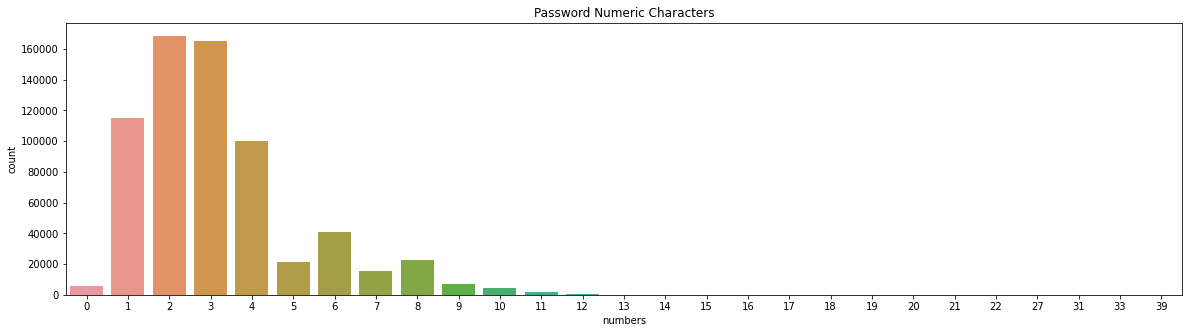

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(password_data, x="numbers")
plt.title('Password Numeric Characters')
plt.show()

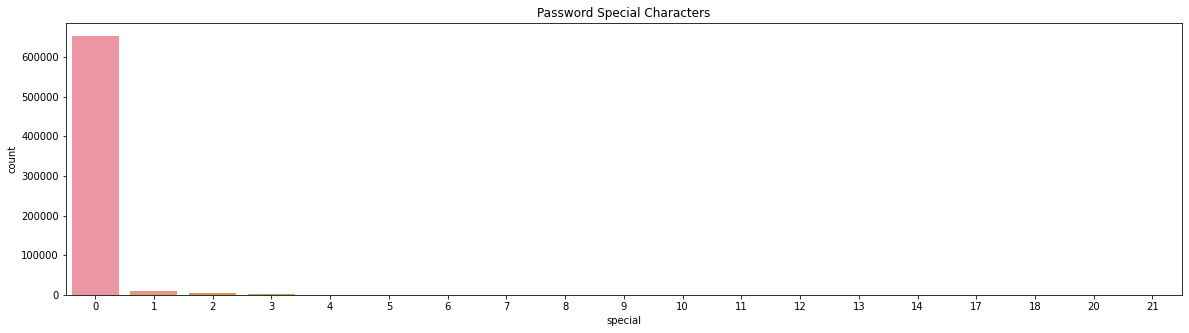

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(password_data, x="special")
plt.title('Password Special Characters')
plt.show()

In [17]:
y=password_data['strength']
X=password_data[['length','uppers','lowers','numbers','special']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
logReg_model = LogisticRegression(random_state=1)
logReg_model.fit(X_train, y_train)
y_pred = logReg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Accuracy Score: {accuracy}')

Mean Squared Error: 7.466698524580372e-06
R-squared Score: 0.9999712403552888
Accuracy Score: 0.9999925333014754


C:\Users\nosaJ\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


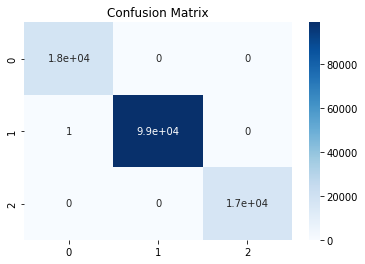

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.show()